In [1]:
# load data from mongo

import pymongo
import pandas as pd
import matplotlib.pyplot as plt

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["upskill"]
mycol = mydb["workshop"]

mydoc = mycol.find()

data = pd.DataFrame(list(mydoc))
data

,_id,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,604db824c2aae9494468ba61,0,67,male,2,own,NA,little,1169,6,radio/TV
1,604db824c2aae9494468ba62,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,604db824c2aae9494468ba63,2,49,male,1,own,little,NA,2096,12,education
3,604db824c2aae9494468ba64,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,604db824c2aae9494468ba65,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...,...
1995,604db824c2aae9494468be44,995,31,female,1,own,little,None,1736,12,furniture/equipment
1996,604db824c2aae9494468be45,996,40,male,3,own,little,little,3857,30,car
1997,604db824c2aae9494468be46,997,38,male,2,own,little,None,804,12,radio/TV
1998,604db824c2aae9494468be47,998,23,male,2,free,little,little,1845,45,radio/TV


<hr>

# EDA

<hr>

In [2]:
# ลบคอลัมน์ '_id'
data = data.drop('_id', axis=1)

In [3]:
# ลบคอลัมน์ Id
data = data.drop('Id', axis=1)

In [4]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NA,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NA,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               2000 non-null   int64 
 1   Sex               2000 non-null   object
 2   Job               2000 non-null   int64 
 3   Housing           2000 non-null   object
 4   Saving accounts   1817 non-null   object
 5   Checking account  1606 non-null   object
 6   Credit amount     2000 non-null   int64 
 7   Duration          2000 non-null   int64 
 8   Purpose           2000 non-null   object
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [6]:
data = pd.get_dummies(data,prefix=['Sex','Housing', 'Saving accounts', 'Checking accounts',
                               'Purpose'],drop_first=True)

In [7]:
data.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking accounts_little,Checking accounts_moderate,Checking accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [8]:
data.describe()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking accounts_little,Checking accounts_moderate,Checking accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
count,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,35.546000,1.90400,3271.25800,20.903000,0.690000,0.713000,0.179000,0.603000,0.103000,0.063000,...,0.274000,0.269000,0.063000,0.337000,0.012000,0.059000,0.181000,0.280000,0.02200,0.012000
std,11.372623,0.65345,2822.03075,12.055798,0.462609,0.452475,0.383448,0.489398,0.304035,0.243024,...,0.446121,0.443551,0.243024,0.472803,0.108912,0.235684,0.385114,0.449111,0.14672,0.108912
min,19.000000,0.00000,250.00000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,2.00000,1365.50000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,33.000000,2.00000,2319.50000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,42.000000,2.00000,3972.25000,24.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
max,75.000000,3.00000,18424.00000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [9]:
#conda install -c conda-forge sckit-learn

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters = 5)

In [12]:
kmeans.fit(data)

KMeans(n_clusters=5)

In [13]:
kmeans.cluster_centers_

array([[ 3.56782787e+01,  1.75614754e+00,  1.36672131e+03,
         1.43299180e+01,  6.39344262e-01,  7.43852459e-01,
         1.82377049e-01,  6.29098361e-01,  9.63114754e-02,
         6.14754098e-02,  5.94262295e-02,  2.70491803e-01,
         2.41803279e-01,  8.19672131e-02,  2.99180328e-01,
         2.04918033e-02,  7.78688525e-02,  1.59836066e-01,
         3.42213115e-01,  2.66393443e-02,  6.14754098e-03],
       [ 3.70312500e+01,  2.46875000e+00,  1.32092812e+04,
         3.84375000e+01,  7.81250000e-01,  5.62500000e-01,
         1.56250000e-01,  5.62500000e-01,  1.25000000e-01,
         3.12500000e-02,  3.12500000e-02,  1.56250000e-01,
         5.93750000e-01,  0.00000000e+00,  4.37500000e-01,
         3.46944695e-18,  6.25000000e-02,  6.25000000e-02,
         9.37500000e-02,  3.12500000e-02,  1.56250000e-01],
       [ 3.65948276e+01,  2.15517241e+00,  5.63756897e+03,
         2.97500000e+01,  7.93103448e-01,  6.81034483e-01,
         1.29310345e-01,  6.63793103e-01,  9.48275862e

In [14]:
kmeans.labels_

array([0, 2, 0, ..., 0, 0, 2], dtype=int32)

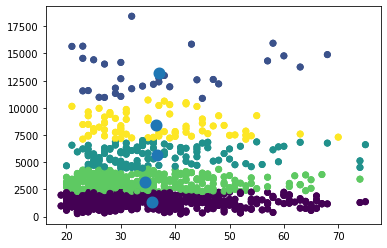

In [15]:
# plot 2D

plt.scatter(data['Age'], data['Credit amount'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,[0]],kmeans.cluster_centers_[:,[2]],linewidths=6)

In [16]:
kmeans.inertia_

935392403.3161318

Text(0, 0.5, 'Sum of Squared distance')

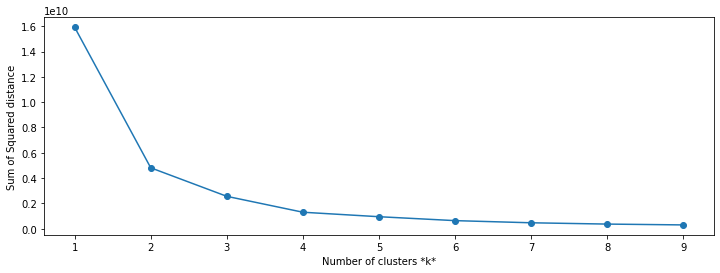

In [19]:
sse = []
list_k = list(range(1,10))

for k in list_k:
    km = KMeans(n_clusters = k)
    km.fit(data)
    sse.append(km.inertia_)
    
plt.figure(figsize=(12,4))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of Squared distance')

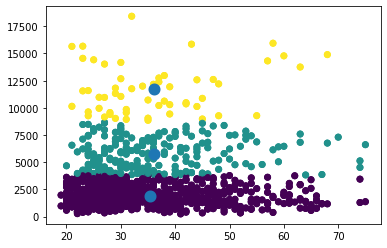

In [24]:
# เปลี่ยนเป็น Kmeans(n_cluster=3)

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
plt.scatter(data['Age'], data['Credit amount'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,[0]],kmeans.cluster_centers_[:,[2]],linewidths=6)

In [25]:
# สมมุติมี data ใหม่เข้ามา

unknown = [[67,2,1169,6,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0]]
kmeans.predict(unknown)

array([0], dtype=int32)